<a href="https://colab.research.google.com/github/MichaelGWhittington/iris-clusters/blob/main/iris_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Exploring Cluster Analysis With Iris Plants**

In this project I will be using the famous Iris dataset to test my machine learning skills specifically with the use of k-means clustering, which is one of the techniques that I learned in my Exploring Machine Learning class taught by Dr. Juliette Paul at North Carolina State University.

In [11]:
# We will be loading in the iris dataset through scikit learn
from sklearn.datasets import load_iris
iris = load_iris()

In [12]:
# Here is the features that are recorded in the dataset
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


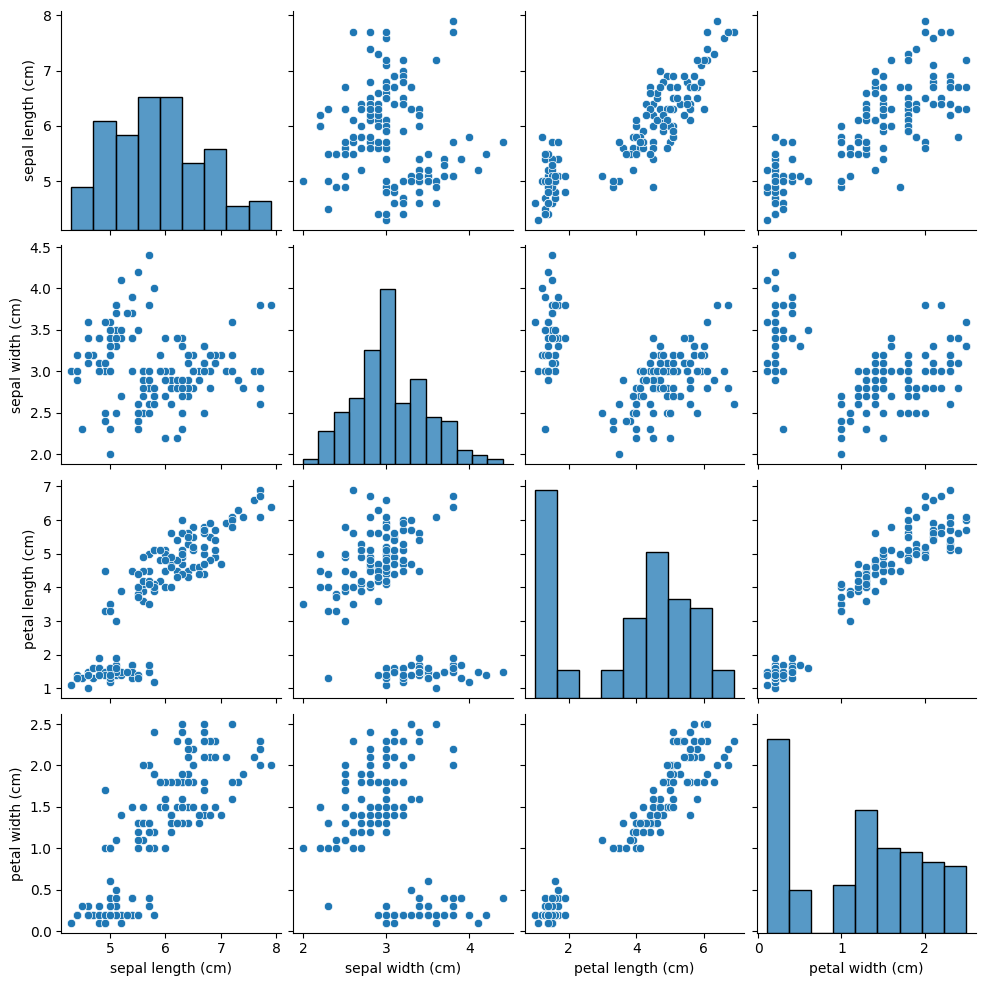

In [13]:
# Next we're going to plot some of the features of the data to see how many clusters we will be looking for
import pandas as pd # For turning the scikit dataset into a dataframe
import seaborn as sns # For creating the pairplot
import matplotlib.pyplot as plt # Used to output the pairplot

df = pd.DataFrame(iris.data, columns=iris.feature_names)


sns.pairplot(df, diag_kind="hist")
plt.show()


Looking at the plots above, there seems to be two distinctive clusters. However, using the [Data Documentation](https://archive.ics.uci.edu/dataset/53/iris), we know that there are really 3 different species of iris plants included in this dataset. That is why we will use machine learning techniques such as k-means cluster analysis to see if we can create a model that can find distinctions between each of the 3 species of iris plants.

In [36]:
# Import sklearn k-means clustering module
from sklearn.cluster import KMeans
k = 3 # For the 3 species of Iris

# Fit the kmeans model with 3 clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(df)



KMeans(n_clusters=3)

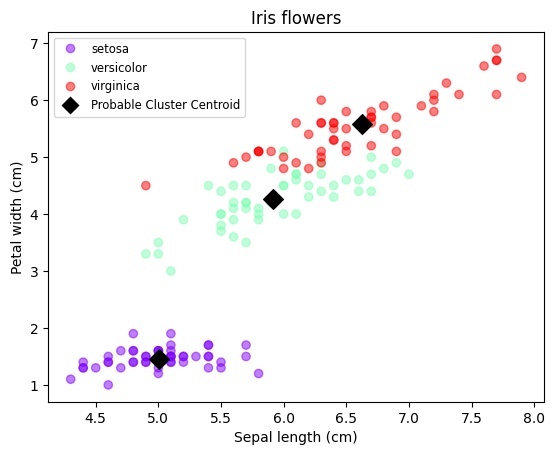

In [62]:
# Now lets graph the predicted cluster centroids against the labeled species to see how accurate our model is.

# Add the species labels to our dataframe for each observation
df["Species"] = iris.target

scatter = plt.scatter(df.iloc[:, 0], df.iloc[:, 2], c=df["Species"], cmap="rainbow", alpha=0.5)

# Scatter plot of our centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], marker='D', c='black', s=100)

# Get the legend elements for the scatter plot
handles, labels = scatter.legend_elements()
species_labels = [iris.target_names[i] for i in range(k)]

# Add custom labels for centroids
centroid_patch = plt.Line2D([0], [0], marker='D', color='w', label='Probable Cluster Centroid',
                            markerfacecolor='black', markersize=10)

# Combine the scatter legend with the centroid legend
plt.legend(handles=handles + [centroid_patch], labels=species_labels + ['Probable Cluster Centroid'], loc='upper left', fontsize = "small")

# Labels
plt.ylabel("Petal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Iris flowers")

plt.show()

In [63]:
# Lets see how close our k means model described the true clusters in the dataset
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(iris.target, kmeans.labels_)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.97993200471804


Our Adjusted Rand Index is very close to 1, therefore our model did a good job at classifying the different species of observed Iris plants when compared to the true species of each observation. In conclusion, when eyeballing the pairplot data it only seems to contain two distinct clusters, however, using cluster analysis reveals identifies harder to notice patterns in the data and can find the third cluster.